In [1]:
import pandas as pd
import warnings
import locale
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.3f}'.format
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

'pt_BR.UTF-8'

## Data Wrangling

In [2]:
caminho = 'dados/Educação/microdados_ed_basica_2023.csv'
encodings = ["utf-8","utf-8-sig", "iso-8859-1", "latin1", "cp1252"]
for encoding in encodings:
	try:
		df = pd.read_csv(caminho,encoding=encoding, sep=';')
		break
	except Exception as e:
		pass

In [4]:
microdados = df.copy(deep=True)
microdados = microdados.loc[(microdados['NO_MUNICIPIO'] == 'Canoas') & (microdados['SG_UF'] == 'RS')]

In [5]:
microdados.to_parquet('dados_educacao.parquet')

## Cararcterísticas das Escolas
<hr>

### Tipos de Dependências Administrativas

#### Dicionário de Dados

* NO_ENTIDADE => Nome da Escola
* TP_DEPENDENCIA => Dependência Administrativa
* TP_CATEGORIA_ESCOLA_PRIVADA => Categoria da escola privada


In [5]:
dependencia_administrativa = {1:'Federal',2:'Esdadual',3:'Municipal',4:'Privada'}
cat_escola_privada = {1:'Particular',2:'Comunitária',3:'Confessional',4:'Filantrópica'}

#### Número de Escolas de cada tipo

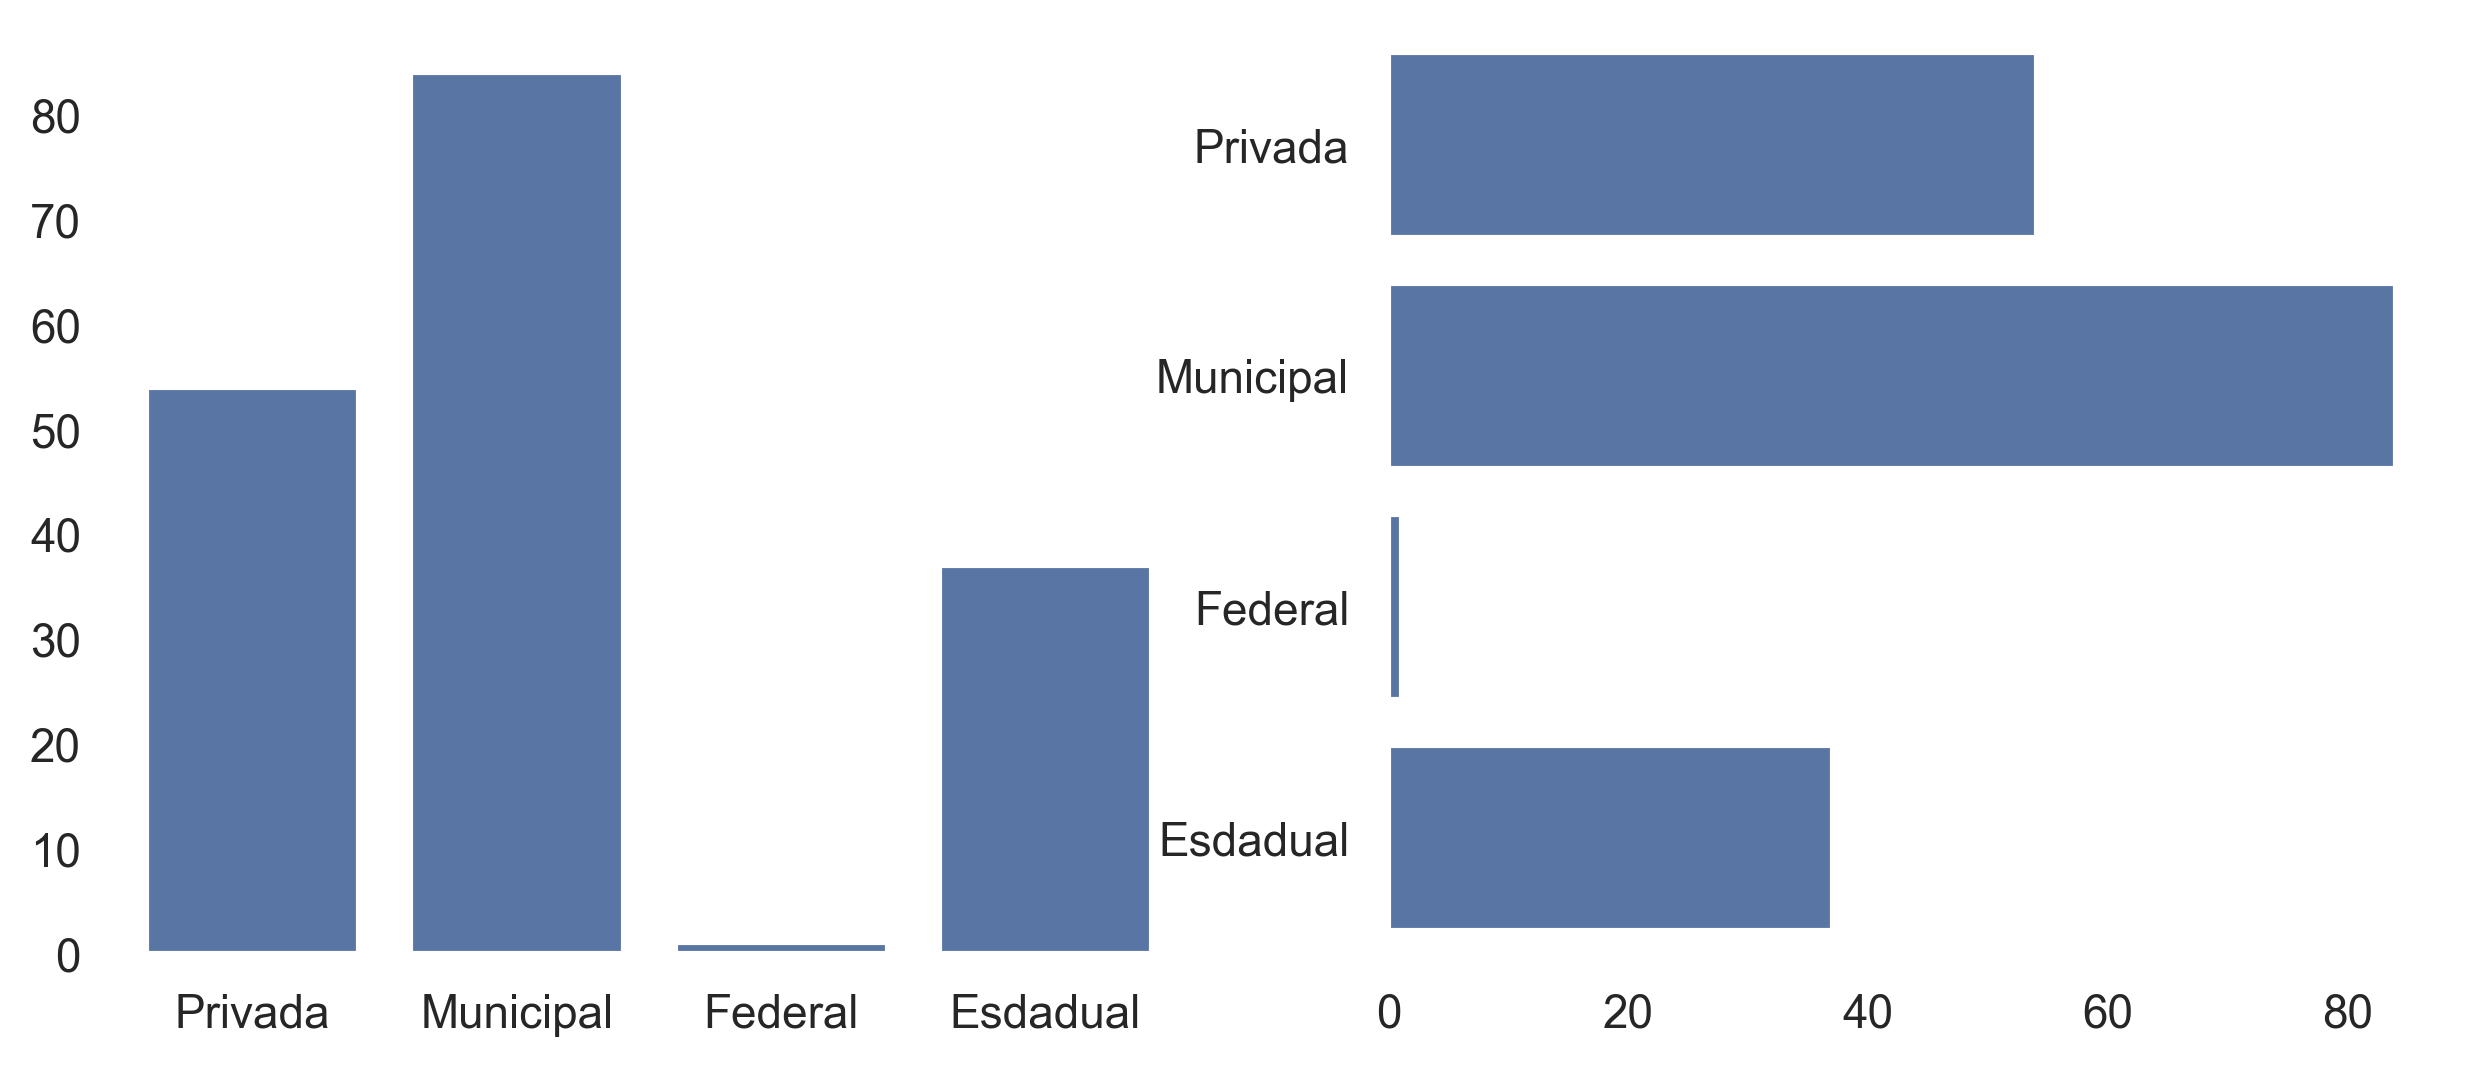

In [36]:
dados_administrativos = microdados.copy(deep=True)
dados_administrativos = dados_administrativos[['NO_ENTIDADE','TP_DEPENDENCIA']]
dados_administrativos['TP_DEPENDENCIA'] = dados_administrativos['TP_DEPENDENCIA'].map(dependencia_administrativa)
dados_administrativos = dados_administrativos.groupby('TP_DEPENDENCIA').count().reset_index()
dados_administrativos = dados_administrativos.sort_values(by='TP_DEPENDENCIA', ascending=False)

# ====================================================================================================================
sns.set_theme(style="white")
fig, axs = plt.subplots(figsize=(8,4),dpi=300)

# Gráfico 01
ax = sns.barplot(data=dados_administrativos, x='TP_DEPENDENCIA',y='NO_ENTIDADE', ax=axs[0])
ax.set_xlabel("")
ax.set_ylabel("")


sns.despine(bottom=True, left=True)
plt.show()